# 2.2.4 Least Mean Squares
#### CS 6350: HW 2

---

[22 points] We will implement the LMS method for a linear regression task. The dataset
is from UCI repository (https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test). The task is to predict the real-valued SLUMP of the concrete, with 7 features.
The features and output are listed in the file “concrete/data-desc.txt”. The training data are stored in the file “concrete/train.csv”, consisting of 53 examples. The
test data are stored in “concrete/test.csv”, and comprise of 50 examples. In both the
training and testing datasets, feature values and outputs are separated by commas.


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline  
#plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
test_data = pd.read_csv('concrete/test.csv', header=None)
train_data = pd.read_csv('concrete/train.csv', header=None)

# first 7 columns are features, last column (Slump) is output
columns = ['Cement', 'Slag', 'Fly ash', 'Water','SP', 'Coarse Aggr', 'Fine Aggr', 'Slump']
features = columns[:-1]
output = columns[-1]

test_data.columns = columns
train_data.columns = columns

In [4]:
train_data.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr,Fine Aggr,Slump
0,-0.890447,-1.295950,1.188030,-1.450430,1.238500,1.876070,-0.818684,-0.005574
1,0.549165,0.066917,-0.517804,0.638098,0.164716,0.227616,-0.945600,0.568593
2,0.941555,-1.292630,1.068030,1.950890,-0.085833,-1.180960,-0.385584,0.798260
3,-0.966886,1.047520,0.376289,1.831540,0.880569,-0.988829,-0.898007,0.568593
4,0.638344,0.233121,-0.364867,0.488917,0.164716,-0.011126,-0.961465,0.855677


---

### A. Batch Gradient Descent

 [8 points] Implement the batch gradient descent algorithm, and tune the learning
rate r to ensure the algorithm converges. To examine convergence, you can watch
the norm of the weight vector difference, kwt−wt−1k, at each step t. if kwt−wt−1k
is less than a tolerance level, say, 1e − 6, you can conclude that it converges. You
can initialize your weight vector to be 0. Please find an appropriate r such that
the algorithm converges. To tune r, you can start with a relatively big value,
say, r = 1, and then gradually decrease r, say r = 0.5, 0.25, 0.125, . . ., until you
see the convergence. Report the learned weight vector, and the learning rate r.
Meanwhile, please record the cost function value of the training data at each step,
and then draw a figure shows how the cost function changes along with steps. Use
your final weight vector to calculate the cost function value of the test data.


In [20]:
def bgd_method(A,b, epsilon, t=0.01):
    """ Batch Gradient Descent Method
    
    Args:
        A (mxn numpy array): input array holding m samples with n features
        b (mx1 numpy array): output 
        epsilon (float): tolerance level
        t (float): learning rate

    Returns:
        tree (dict): dictionary structure represented the decision tree
  
    """
    x = np.zeros(A.shape[1])
    
    diff = 1

    iter=0
    fun_val=f(A,b,x)
    fun_history = fun_val
    
    grad=g(A,b,x)
    while (np.linalg.norm(diff)>epsilon):
        iter=iter+1
        
        # break out of while loop if diverging
        if np.linalg.norm(diff)>1e20:
            break
  
        # define new point x = x + t d, d = - grad
        x_new=x-t*grad
        diff = x_new - x
        x = x_new

        fun_val= f(A,b,x)
        fun_history = np.vstack((fun_history,fun_val))
        grad = g(A,b,x)
        #if iter % 100 == 0:
            #print('iter_number = {}, tol = {:.4e}, fun_val = {:.4e}'.format(iter, np.linalg.norm(diff), fun_val))
        
    if np.linalg.norm(diff)>1e20:
        iter = None
        print('Algorithm does not converge!')
    print('iter_number = {}, tol = {:.4e}, fun_val = {:.4e}'.format(iter, np.linalg.norm(diff), fun_val))
    return x, fun_history

In [21]:
def f(A,b, x):
    """ Calculates the loss funtion value
    """
    val = 0.0
    
    for i in range(A.shape[0]):
        val += (b[i] - np.dot(x,A[i,:]))**2
        
    return val / 2

In [22]:
def g(A,b, x):
    """ Calculates the gradient
    """
    grad = np.zeros(x.shape)
    
    for j in range(len(grad)):
        for i in range(A.shape[0]):
            grad[j] += (b[i] - np.dot(x,A[i,:]))*A[i,j]
        
    return - grad

### Learning weights

In [11]:
train_data_array = train_data.to_numpy()

A = train_data_array[:,:-1]
A = np.insert(A,0,np.ones(A.shape[0]), axis=1)

b = train_data_array[:,-1]

In [12]:
A.shape, b.shape

((53, 8), (53,))

In [13]:
epsilon = 1e-6

In [23]:
x, fh = bgd_method(A,b, epsilon)

iter_number = 7094, tol = 9.9916e-07, fun_val = 1.4982e+01


In [16]:
fh.shape

(7095, 1)

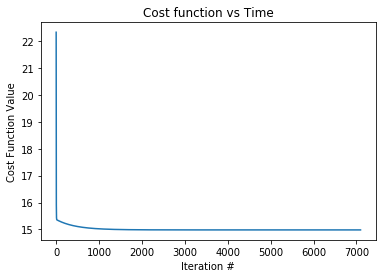

In [19]:
plt.plot(range(len(fh)),fh)
plt.title('Cost function vs Time')
plt.xlabel('Iteration #')
plt.ylabel('Cost Function Value')

plt.show()

### Tuning learning rate

In [100]:
rates = [1/(2**i) for i in range(8)]

rates

[1.0, 0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125]

In [62]:
4%2

0

In [101]:
def test():
    print(rates)

In [102]:
test()

[1.0, 0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125]


In [24]:
x1, fh1 = bgd_method(A,b, epsilon,t=1)

Algorithm does not converge!
iter_number = None, tol = 2.1795e+20, fun_val = 3.1189e+42


In [25]:
x2, fh2 = bgd_method(A,b, epsilon,t=0.5)

Algorithm does not converge!
iter_number = None, tol = 8.5691e+20, fun_val = 4.7487e+43


In [26]:
x3, fh3 = bgd_method(A,b, epsilon,t=0.25)

Algorithm does not converge!
iter_number = None, tol = 1.8467e+20, fun_val = 2.1388e+42


In [27]:
x4, fh4 = bgd_method(A,b, epsilon,t=0.125)

Algorithm does not converge!
iter_number = None, tol = 4.5099e+20, fun_val = 1.1979e+43


In [28]:
x5, fh5 = bgd_method(A,b, epsilon,t=0.0625)

Algorithm does not converge!
iter_number = None, tol = 6.3839e+20, fun_val = 2.1036e+43


In [29]:
x6, fh6 = bgd_method(A,b, epsilon,t=0.03125)

Algorithm does not converge!
iter_number = None, tol = 1.8178e+20, fun_val = 1.2720e+42


In [30]:
x7, fh7 = bgd_method(A,b, epsilon,t=0.015625)

Algorithm does not converge!
iter_number = None, tol = 1.0038e+20, fun_val = 1.8157e+41


In [31]:
x8, fh8 = bgd_method(A,b, epsilon,t=0.0078125)

iter_number = 8800, tol = 9.9976e-07, fun_val = 1.4982e+01


In [32]:
x9, fh9 = bgd_method(A,b, epsilon,t=0.01)

iter_number = 7094, tol = 9.9916e-07, fun_val = 1.4982e+01


In [49]:
x1

array([ 1.25782450e+19, -7.44583085e+19, -3.29490909e+19,  1.02449845e+20,
       -9.06900232e+19, -3.83129243e+18,  1.16565683e+20, -8.76358779e+19])

In [39]:
x9

array([-0.01520362,  0.90022499,  0.78594341,  0.85066508,  1.29862298,
        0.12983393,  1.5717928 ,  0.99834709])

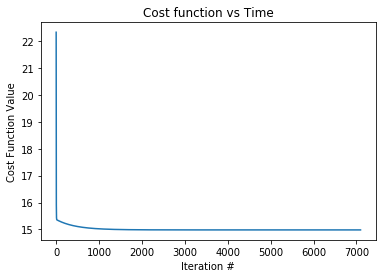

In [38]:
plt.plot(range(len(fh9)),fh9)
plt.title('Cost function vs Time')
plt.xlabel('Iteration #')
plt.ylabel('Cost Function Value')

#plt.xlim([-100, 1000])

plt.savefig('BGD_cost_vs_time.pdf')
plt.show()

Use your final weight vector to calculate the cost function value of the test data:

In [121]:
# cost function on training data
fh9[-1]

array([14.98194366])

In [40]:
test_data_array = test_data.to_numpy()

A_test = test_data_array[:,:-1]
A_test = np.insert(A_test,0,np.ones(A_test.shape[0]), axis=1)

b_test = test_data_array[:,-1]

In [51]:
# cost funtion on test data
f(A_test,b_test, x9)

23.3613052691966

---

### B. Stochastic Gradient Descent

 [8 points] Implement the stochastic gradient descent (SGD) algorithm. You can
initialize your weight vector to be 0. Each step, you randomly sample a training
example, and then calculate the stochastic gradient to update the weight vector.
Tune the learning rate r to ensure your SGD converges. To check convergence, you
can calculate the cost function of the training data after each stochastic gradient
update, and draw a figure showing how the cost function values vary along with
the number of updates. At the beginning, your curve will oscillate a lot. However,
with an appropriate r, as more and more updates are finished, you will see the
cost function tends to converge. Please report the learned weight vector, and the
learning rate you chose, and the cost function value of the test data with your
learned weight vector.

(53, 8)

In [61]:
def sgd_method(df, attrs, target_attr, epsilon, t=0.01):
    """ Stochastic Gradient Descent Method
    
    Args:
        A (mxn numpy array): input array holding m samples with n features
        b (mx1 numpy array): output 
        epsilon (float): tolerance level
        t (float): learning rate

    Returns:
        tree (dict): dictionary structure represented the decision tree
  
    """
    
    m,n = df.shape
    
    # convert to numpy array
    data = df.to_numpy()
    
    # Separate to Ax=b where A is input matrix, x is vector of weights, and b the vector of outputs
    A = data[:,:-1]
    A = np.insert(A,0,np.ones(m), axis=1)
    b = data[:,-1] 
    x = np.zeros(n)

    iter=0
    max_iter = 100000
    cur_val=100
    prev_val = np.inf
    history = cur_val
    
    while np.linalg.norm(prev_val-cur_val) > epsilon and iter < max_iter:
        iter = iter + 1
        prev_val = cur_val
        
        # shuffle indexes for sampling
        indexes = np.random.randint(m, size=m)
        
        for i in indexes:
            # define new point x = x + t d, d = - grad
            x = x + t*(b[i] - np.dot(x,A[i]))*A[i]

        cur_val= f(A,b,x)
        history = np.vstack((history,cur_val))
            
        
        #print('i = {}, tol = {:.4e}, fun_val = {:.4e}'.format(iter, np.linalg.norm(prev_val-cur_val), cur_val))
        
    print('i = {}, tol = {:.4e}, fun_val = {:.4e}'.format(iter, np.linalg.norm(prev_val-cur_val), cur_val))
    return x, history

In [44]:
data = train_data

In [59]:
x, h = sgd_method(data, features, output, epsilon,t=0.01)

i = 40000, tol = 1.4301e-02, fun_val = 1.5516e+01


In [45]:
x_b, h_b = sgd_method(data, features, output, epsilon,t=0.00001)

i = 3300, tol = 7.8499e-07, fun_val = 1.6378e+01


In [47]:
h_b.shape

(3301, 1)

In [73]:
def plot_cost(hist, title):
    plt.plot(range(len(h_b)),h_b)
    plt.title(title)
    plt.xlabel('Number of Updates')
    plt.ylabel('Cost Function Value')

    plt.xlim([-100, 1000])
    plt.ylim([14, 24])

    #plt.savefig('{}.pdf'.format(title))
    plt.show()  

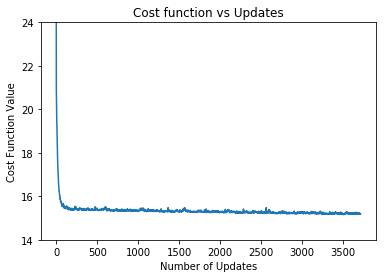

In [66]:
plt.plot(range(len(h_b)),h_b)
plt.title('Cost function vs Updates')
plt.xlabel('Number of Updates')
plt.ylabel('Cost Function Value')

#plt.xlim([-100, 1000])
plt.ylim([14, 24])

plt.savefig('SGD_cost_vs_time.pdf')
plt.show()

i = 4507, tol = 6.1541e-08, fun_val = 1.5176e+01


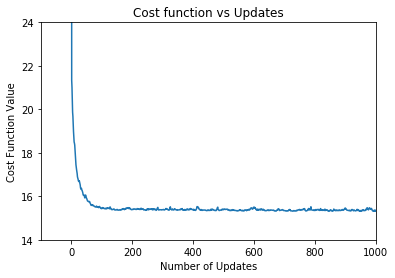

In [70]:
x_b, h_b = sgd_method(data, features, output, epsilon,t=0.001)
plt.plot(range(len(h_b)),h_b)
plt.title(title)
plt.xlabel('Number of Updates')
plt.ylabel('Cost Function Value (r=0.001)')

plt.xlim([-100, 1000])
plt.ylim([14, 24])

plt.savefig('r001.pdf')
plt.show()

i = 100000, tol = 1.6394e-01, fun_val = 1.5188e+01


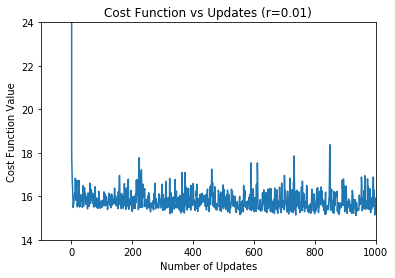

In [76]:
x_b, h_b = sgd_method(data, features, output, epsilon,t=0.01)
plt.plot(range(len(h_b)),h_b)
plt.title('Cost Function vs Updates (r=0.01)')
plt.xlabel('Number of Updates')
plt.ylabel('Cost Function Value')

plt.xlim([-100, 1000])
plt.ylim([14, 24])

plt.savefig('r01.pdf')
plt.show()

i = 100000, tol = 2.2355e-02, fun_val = 1.5412e+01


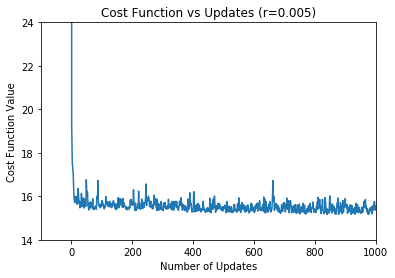

In [78]:
x_b, h_b = sgd_method(data, features, output, epsilon,t=0.005)
plt.plot(range(len(h_b)),h_b)
plt.title('Cost Function vs Updates (r=0.005)')
plt.xlabel('Number of Updates')
plt.ylabel('Cost Function Value')

plt.xlim([-100, 1000])
plt.ylim([14, 24])

plt.savefig('r005.pdf')
plt.show()

i = 7102, tol = 7.4651e-07, fun_val = 1.5082e+01


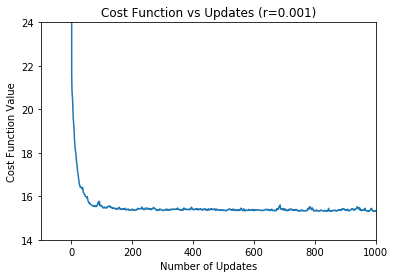

In [79]:
x_b, h_b = sgd_method(data, features, output, epsilon,t=0.001)
plt.plot(range(len(h_b)),h_b)
plt.title('Cost Function vs Updates (r=0.001)')
plt.xlabel('Number of Updates')
plt.ylabel('Cost Function Value')

plt.xlim([-100, 1000])
plt.ylim([14, 24])

plt.savefig('r001.pdf')
plt.show()

i = 15951, tol = 3.9870e-07, fun_val = 1.5077e+01


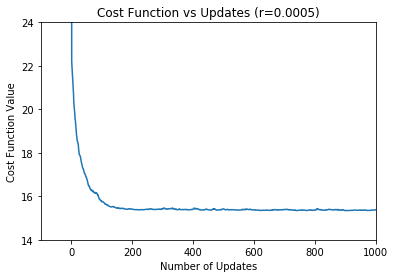

In [80]:
x_b, h_b = sgd_method(data, features, output, epsilon,t=0.0005)
plt.plot(range(len(h_b)),h_b)
plt.title('Cost Function vs Updates (r=0.0005)')
plt.xlabel('Number of Updates')
plt.ylabel('Cost Function Value')

plt.xlim([-100, 1000])
plt.ylim([14, 24])

plt.savefig('r0005.pdf')
plt.show()

i = 932, tol = 6.3786e-08, fun_val = 1.5433e+01


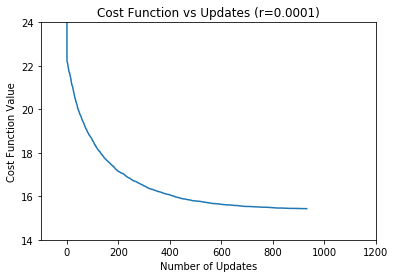

In [86]:
x_b, h_b = sgd_method(data, features, output, epsilon,t=0.0001)
plt.plot(range(len(h_b)),h_b)
plt.title('Cost Function vs Updates (r=0.0001)')
plt.xlabel('Number of Updates')
plt.ylabel('Cost Function Value')

plt.xlim([-100, 1200])
plt.ylim([14, 24])

plt.savefig('r0001.pdf')
plt.show()

In [87]:
x_b

array([-0.03712451, -0.05441327, -0.22296427, -0.2290922 ,  0.45588458,
       -0.03449658,  0.20263594, -0.01664133])

In [88]:
f(A_test,b_test, x_b)

22.4152736082708

i = 1098, tol = 1.7663e-07, fun_val = 1.5339e+01


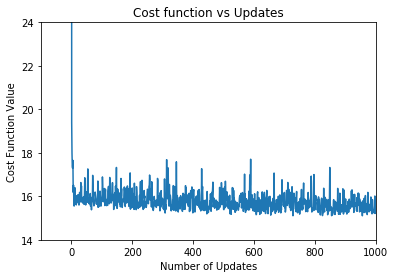

In [71]:
x_b, h_b = sgd_method(data, features, output, epsilon,t=0.01)
plot_cost(h_b)

i = 100000, tol = 4.9310e-01, fun_val = 1.6471e+01


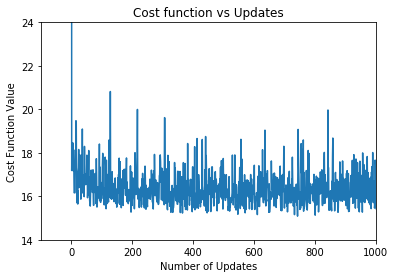

In [72]:
x_b, h_b = sgd_method(data, features, output, epsilon,t=0.02)
plot_cost(h_b)

In [ ]:
x_b, h_b = sgd_method(data, features, output, epsilon,t=0.02)
plot_cost(h_b)

In [90]:
A_test.shape

(50, 8)

In [91]:
b_test.shape

(50,)

In [93]:
x = np.linalg.solve(np.dot(A_test.transpose(),A_test), np.dot(A_test.transpose(),b_test))

In [189]:
c = np.random.randint(len(train_data), size=len(train_data))

In [190]:
len(c)

53

In [160]:
train_data.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr,Fine Aggr,Slump
0,-0.890447,-1.295950,1.188030,-1.450430,1.238500,1.876070,-0.818684,-0.005574
1,0.549165,0.066917,-0.517804,0.638098,0.164716,0.227616,-0.945600,0.568593
2,0.941555,-1.292630,1.068030,1.950890,-0.085833,-1.180960,-0.385584,0.798260
3,-0.966886,1.047520,0.376289,1.831540,0.880569,-0.988829,-0.898007,0.568593
4,0.638344,0.233121,-0.364867,0.488917,0.164716,-0.011126,-0.961465,0.855677


In [147]:
d = train_data.sample(frac=1)   

In [148]:
d.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr,Fine Aggr,Slump
9,-0.852227,1.180480,0.493932,-0.853710,1.238500,-0.465871,0.101456,-2.072580
46,-0.903186,-1.295950,1.164500,-1.102350,1.238500,1.785120,-0.898007,0.338926
49,0.867663,0.482426,-1.753060,-0.555349,-0.909064,-0.056600,1.196110,-1.728080
7,-0.182107,0.580486,1.058620,0.076184,-0.407967,0.000243,-1.435810,1.085340
8,-1.142700,-0.551360,1.010390,-1.286330,-1.088030,1.860150,-0.564853,0.626010


In [137]:
d.shape

(53, 8)

In [ ]:
train_data.size

In [125]:
train_data.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr,Fine Aggr,Slump
0,-0.890447,-1.295950,1.188030,-1.450430,1.238500,1.876070,-0.818684,-0.005574
1,0.549165,0.066917,-0.517804,0.638098,0.164716,0.227616,-0.945600,0.568593
2,0.941555,-1.292630,1.068030,1.950890,-0.085833,-1.180960,-0.385584,0.798260
3,-0.966886,1.047520,0.376289,1.831540,0.880569,-0.988829,-0.898007,0.568593
4,0.638344,0.233121,-0.364867,0.488917,0.164716,-0.011126,-0.961465,0.855677


In [129]:
features

['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr', 'Fine Aggr']

In [130]:
output

'Slump'

In [ ]:
stoc_gradient_method(train_data, features, output, epsilon, t=0.01)

In [94]:
x

array([ 0.03833292, -1.05154506, -1.38454837, -1.0843673 , -0.34476282,
       -0.24711868, -1.36924673, -0.65715817])

In [98]:
f(A,b, x)

25.75220221150899

In [105]:
A_test.shape

(50, 8)

In [106]:
b_test.shape

(50,)

---

### C. Optimal weight vector with analytical form

[6 points] We have discussed how to calculate the optimal weight vector with an
analytical form. Please calculate the optimal weight vector in this way. Comparing with the weight vectors learned by batch gradient descent and stochastic
gradient descent, what can you conclude? Why?


In [111]:
A = np.array([[1,1,-1,2],[1,1,1,3],[1,-1,1,0],[1,1,2,-4],[1,3,-1,-1]])
A

array([[ 1,  1, -1,  2],
       [ 1,  1,  1,  3],
       [ 1, -1,  1,  0],
       [ 1,  1,  2, -4],
       [ 1,  3, -1, -1]])

In [107]:
b = np.array([1,4,-1,-2,0])
b

array([ 1,  4, -1, -2,  0])

In [108]:
b.shape

(5,)

In [112]:
np.linalg.solve(np.dot(A.transpose(),A), np.dot(A.transpose(),b))

array([-1.,  1.,  1.,  1.])

In [132]:
def grad(w,b, x):
    res = (1 - (w[0]-w[1]+2*w[2]+b))*x[0] + (4 - (w[0]+w[1]+3*w[2]+b))*x[1]  + (-1 - (-w[0]+w[1]+b))*x[2] + (-2 - (w[0]+2*w[1]-4*w[2]+b))*x[3] + (0 - (3*w[0]-w[1]-w[2]+b))*x[4] 
    
    return res

In [141]:
grad([0.5,-0.5, 0.5],1, [1,1,1,1,1])

-4.5

In [142]:
grad([0.5, -0.5, 0.5],1, [1,1,-1,1,3])

-7.5

In [143]:
grad([0.5, -0.5, 0.5],1, [-1,1,1,2,-1])

4.0

In [144]:
grad([0.5, -0.5, 0.5],1, [2,3,0,-4,-1])

5.0